# <span style= 'color:blue'> IDENTIFICATION DE TYPE DES CARTES AVEC DATA AUGMENTATION  : </span>
---

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os
import PIL
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

#  <h2><span style= 'color:noir'> 1-creation de dossier de collecte de donnees: </span></h2>
---

In [2]:
data_dir='projet_datasets'
data_dir=pathlib.Path(data_dir)

In [3]:
data_dir

WindowsPath('projet_datasets')

In [4]:
len(list(data_dir.glob('*/*.jpg')))

28

In [5]:
identite=list(data_dir.glob('carte_identite/*.jpg'))

In [6]:
identite

[WindowsPath('projet_datasets/carte_identite/1.jpg'),
 WindowsPath('projet_datasets/carte_identite/2.jpg'),
 WindowsPath('projet_datasets/carte_identite/250708027_310017170597678_5832748457471198152_n.jpg'),
 WindowsPath('projet_datasets/carte_identite/252463129_403606371465233_6212191988448028927_n.jpg'),
 WindowsPath('projet_datasets/carte_identite/254539803_3031480150457174_8095930440484568339_n.jpg'),
 WindowsPath('projet_datasets/carte_identite/261382785_423118995946535_6939080892210399806_n.jpg'),
 WindowsPath('projet_datasets/carte_identite/272196300_302611315042048_3881308137076350658_n.jpg'),
 WindowsPath('projet_datasets/carte_identite/273054340_257499533195457_3760227199780235795_n.jpg'),
 WindowsPath('projet_datasets/carte_identite/273062752_763333531725487_4511208808530966356_n.jpg'),
 WindowsPath('projet_datasets/carte_identite/273453507_431461575392647_9090135951975398600_n.jpg'),
 WindowsPath('projet_datasets/carte_identite/273466394_426592385913388_80934928149400946_n.

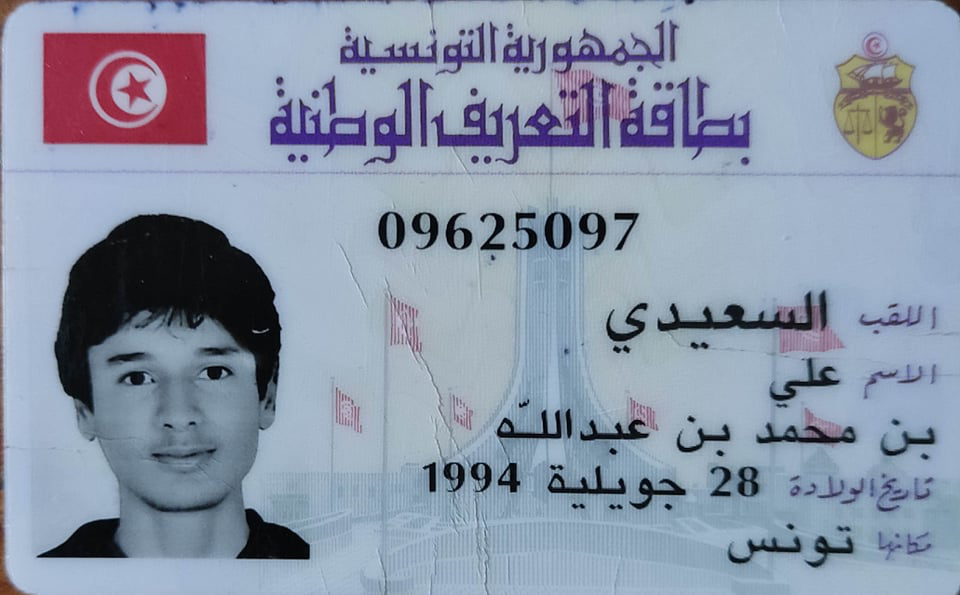

In [7]:
PIL.Image.open(str(identite[0]))

#  <h2><span style= 'color:noir'> 2-creation des classes : </span></h2>
---

In [8]:
cartes_images_dict={
    'carte_identite' : list(data_dir.glob('carte_identite/*.jpg')),
    'carte_grise' : list(data_dir.glob('carte_grise/*.jpg')),
    
}

In [9]:
cartes_labels_dict={
    'carte_identite' : 0,
    'carte_grise' : 1,
    
    
}

In [10]:
cartes_labels_dict

{'carte_identite': 0, 'carte_grise': 1}

In [11]:
cartes_images_dict['carte_identite'][0]

WindowsPath('projet_datasets/carte_identite/1.jpg')

In [12]:
img=cv2.imread(str(cartes_images_dict['carte_identite'][0]))
img.shape

(595, 960, 3)

#  <h2><span style= 'color:noir'> 3-creation de datasets: </span></h2>
---

In [13]:
x,y=[],[]
for carte_name,images in cartes_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(100,100))
        x.append(resized_img)
        y.append(cartes_labels_dict[carte_name])

In [14]:
x

[array([[[ 56,  75, 108],
         [ 66,  81, 115],
         [127, 121, 135],
         ...,
         [195, 169, 153],
         [ 73,  71,  76],
         [ 23,  31,  53]],
 
        [[ 62,  81, 119],
         [116, 112, 133],
         [214, 186, 169],
         ...,
         [200, 173, 153],
         [194, 171, 149],
         [ 52,  48,  52]],
 
        [[ 74,  91, 121],
         [212, 189, 174],
         [211, 188, 173],
         ...,
         [201, 174, 157],
         [203, 171, 155],
         [195, 170, 150]],
 
        ...,
 
        [[ 57,  74, 113],
         [217, 192, 175],
         [213, 192, 175],
         ...,
         [202, 181, 160],
         [201, 180, 159],
         [200, 179, 158]],
 
        [[ 34,  56, 105],
         [135, 122, 131],
         [214, 191, 171],
         ...,
         [201, 180, 159],
         [201, 180, 159],
         [200, 178, 158]],
 
        [[ 31,  56, 103],
         [ 49,  70, 114],
         [161, 147, 148],
         ...,
         [200, 179, 158],
  

In [15]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [19]:
len(x_train)


21

In [20]:
y_train.shape

(21,)

In [21]:
len(x_test)

7

In [22]:
len(y_test)

7

#  <h2><span style= 'color:noir'> 4-transformation binaire de deux classes categorique : </span></h2>
---

In [23]:
y_train_categorical=tf.keras.utils.to_categorical(y_train,  num_classes=2,dtype="float32")

In [24]:
y_test_categorical=tf.keras.utils.to_categorical(y_test,  num_classes=2,dtype="float32")

#  <h2><span style= 'color:noir'> 5-creer des echantillons avec data augmentation (a personaliser) : </span></h2>
---

In [25]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
    layers.experimental.preprocessing.RandomZoom(0.8),
    layers.experimental.preprocessing.RandomZoom(0.5),
    layers.experimental.preprocessing.RandomZoom(0.6),
    layers.experimental.preprocessing.RandomZoom(0.7),
    layers.experimental.preprocessing.RandomZoom(0.4),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomZoom(0.3),
    
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomContrast(0.3),
    layers.experimental.preprocessing.RandomContrast(0.4),
    layers.experimental.preprocessing.RandomContrast(0.5),
    layers.experimental.preprocessing.RandomContrast(0.6),
    layers.experimental.preprocessing.RandomContrast(0.7),
    layers.experimental.preprocessing.RandomContrast(0.8),
    layers.experimental.preprocessing.RandomContrast(0.9),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(100,100,3)),
   
])

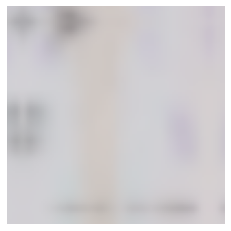

In [26]:
plt.axis('off')
plt.imshow(data_augmentation(x)[5].numpy().astype("uint8"))#convert to numpy array

In [27]:
data_augmentation(x).shape

TensorShape([28, 100, 100, 3])

#  <h2><span style= 'color:noir'> 6-normalisation des donnees d entrainement et test : </span></h2>
---

In [28]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
num_classes=2

#  <h2><span style= 'color:noir'> 7-creer le cnn : </span></h2>
---

In [29]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),#best 0.2 generalization
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='sigmoid'),
    
])

In [30]:
model.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy'],
)

In [31]:
model.fit(x_train_scaled, y_train_categorical, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.6922 - accuracy: 0.5238
Epoch 2/30
1/1 [==============================] - 0s 26ms/step - loss: 0.6816 - accuracy: 0.5714
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 0.6753 - accuracy: 0.6667
Epoch 4/30
1/1 [==============================] - 0s 25ms/step - loss: 0.6505 - accuracy: 0.5714
Epoch 5/30
1/1 [==============================] - 0s 23ms/step - loss: 0.6171 - accuracy: 0.5714
Epoch 6/30
1/1 [==============================] - 0s 23ms/step - loss: 0.6156 - accuracy: 0.6190
Epoch 7/30
1/1 [==============================] - 0s 22ms/step - loss: 0.5922 - accuracy: 0.7619
Epoch 8/30
1/1 [==============================] - 0s 23ms/step - loss: 0.5832 - accuracy: 0.8095
Epoch 9/30
1/1 [==============================] - 0s 24ms/step - loss: 0.4867 - accuracy: 0.8571
Epoch 10/30
1/1 [==============================] - 0s 23ms/step - loss: 0.6039 - accuracy: 0.6667
Epoch 11/30
1/1 [==============

In [32]:
model.evaluate(x_test_scaled,y_test_categorical)

1/1 [==============================] - 0s 200ms/step - loss: 0.1368 - accuracy: 1.0000


[0.1367795616388321, 1.0]

#  <h2><span style= 'color:noir'> 8-prediction avec test sets : </span></h2>
---

In [33]:
y_pred=model.predict(x_test_scaled)

In [34]:
y_pred

array([[0.82186776, 0.17513916],
       [0.01603607, 0.9842441 ],
       [0.82060564, 0.1776751 ],
       [0.0307359 , 0.9718953 ],
       [0.7969881 , 0.21049847],
       [0.76674676, 0.2469545 ],
       [0.01440825, 0.9860167 ]], dtype=float32)

In [35]:
y_test

array([0, 1, 0, 1, 0, 0, 1])

In [36]:
y_pred_binary=[np.argmax(e) for e in y_pred]

In [37]:
y_pred_binary

[0, 1, 0, 1, 0, 0, 1]

In [38]:
cartes_labels=['carte_identite','carte_grise']

In [39]:
cartes_labels[y_pred_binary[1]]

'carte_grise'

#  <h2><span style= 'color:noir'> 9-tester avec carte quelconque : </span></h2>
---

In [40]:
img1=cv2.imread('baha_ghrisi.jpg')
resized_img1=cv2.resize(img1,(100,100))
resized_img1=resized_img1/255
resized_img1

array([[[0.        , 0.        , 0.03529412],
        [0.01568627, 0.01176471, 0.03137255],
        [0.89019608, 0.87843137, 0.89411765],
        ...,
        [0.97647059, 0.99215686, 0.99607843],
        [0.2627451 , 0.23921569, 0.24313725],
        [0.05098039, 0.07843137, 0.05882353]],

       [[0.00392157, 0.        , 0.03529412],
        [0.98823529, 0.97647059, 0.98823529],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.21176471, 0.22352941, 0.21568627]],

       [[0.01176471, 0.        , 0.08235294],
        [1.        , 1.        , 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 1.        , 1.        ],
        [1.        , 0.99607843, 1.        ],
        [0.97647059, 0.99607843, 0.99215686]],

       ...,

       [[0.98431373, 0.99607843, 0.99215686],
        [0.99607843, 0.99607843, 1.        ],
        [1.        , 1

In [41]:
y_pred_1=model.predict(resized_img1[None,...])

In [42]:
y_pred_1=np.argmax(y_pred_1)

In [43]:
y_pred_1

0

In [44]:
cartes_labels[y_pred_1]

'carte_identite'

In [45]:
img2=cv2.imread('g.jpg')
resized_img2=cv2.resize(img2,(100,100))
resized_img2=resized_img2/255
resized_img2

array([[[0.11764706, 0.24705882, 0.56078431],
        [0.12941176, 0.24705882, 0.55686275],
        [0.1372549 , 0.24705882, 0.54901961],
        ...,
        [0.24313725, 0.34509804, 0.48627451],
        [0.21568627, 0.33333333, 0.47058824],
        [0.21176471, 0.32941176, 0.46666667]],

       [[0.11764706, 0.23529412, 0.54117647],
        [0.11372549, 0.23137255, 0.54117647],
        [0.12156863, 0.23921569, 0.54117647],
        ...,
        [0.24313725, 0.34901961, 0.49019608],
        [0.22352941, 0.34117647, 0.47843137],
        [0.20784314, 0.3254902 , 0.4627451 ]],

       [[0.09803922, 0.19215686, 0.49019608],
        [0.09803922, 0.20784314, 0.50980392],
        [0.11764706, 0.22352941, 0.5254902 ],
        ...,
        [0.23529412, 0.34509804, 0.46666667],
        [0.23137255, 0.34117647, 0.4745098 ],
        [0.23137255, 0.34117647, 0.4745098 ]],

       ...,

       [[0.14901961, 0.31372549, 0.52156863],
        [0.15294118, 0.31764706, 0.5254902 ],
        [0.15686275, 0

In [46]:
y_pred_2=model.predict(resized_img2[None,...])

In [47]:
y_pred_2

array([[0.20743018, 0.85056704]], dtype=float32)

In [48]:
y_pred_2=np.argmax(y_pred_2)

In [49]:
cartes_labels[y_pred_2]

'carte_grise'

In [50]:
img3=cv2.imread('test.jpg')
resized_img3=cv2.resize(img3,(100,100))
resized_img3=resized_img3/255
resized_img3

array([[[0.65882353, 0.6745098 , 0.65490196],
        [0.61960784, 0.63137255, 0.62352941],
        [0.67843137, 0.68235294, 0.66666667],
        ...,
        [0.49411765, 0.51764706, 0.51372549],
        [0.49019608, 0.50196078, 0.49411765],
        [0.51764706, 0.52156863, 0.50588235]],

       [[0.65098039, 0.66666667, 0.64705882],
        [0.65098039, 0.66666667, 0.65490196],
        [0.65882353, 0.67843137, 0.6745098 ],
        ...,
        [0.50196078, 0.52941176, 0.50980392],
        [0.49803922, 0.51372549, 0.50588235],
        [0.49803922, 0.50196078, 0.49411765]],

       [[0.67058824, 0.68235294, 0.6745098 ],
        [0.6627451 , 0.67843137, 0.67058824],
        [0.63921569, 0.67058824, 0.68627451],
        ...,
        [0.48627451, 0.51764706, 0.50196078],
        [0.49803922, 0.50980392, 0.49411765],
        [0.50588235, 0.51372549, 0.51372549]],

       ...,

       [[0.42745098, 0.49019608, 0.57647059],
        [0.56862745, 0.67843137, 0.82352941],
        [0.52941176, 0

In [51]:
y_pred_3=model.predict(resized_img3[None,...])

In [52]:
y_pred_3

array([[0.03999954, 0.96466863]], dtype=float32)

In [53]:
y_pred_3=np.argmax(y_pred_3)

In [54]:
cartes_labels[y_pred_3]

'carte_grise'